In [ ]:
from simulation import evaluate, interpolate
import numpy as np
from utils import *
import matplotlib.pyplot as plt
from xfoil import XFoil
from xfoil.model import Airfoil
import os, psutil, gc
process = psutil.Process()

airfoil = np.loadtxt('baseline.dat')
airfoil = interpolate(airfoil, 256, 3)

xf = XFoil()
count = 0
af = np.copy(airfoil)
cl = 0.65
xf.print = 0
xf.airfoil = Airfoil(af[:,0], af[:,1])
xf.Re = 5.8e4
xf.M = 0
xf.max_iter = 2000
a, cd, cm, cp = xf.cl(cl)
perf = cl/cd
cdc = cd

af = setflap(af, theta=-2, pose = 0.7)
xf.airfoil = Airfoil(af[:,0], af[:,1])
xf.Re = 4e5
xf.M = 0
xf.max_iter = 2000
a, cl, cd, cm, cp = xf.aseq(-2, 2, 0.5)
print(perf, cd.min())
del xf

In [ ]:
import numpy as np
from utils import *
points = 'results/airfoilPPO.dat'
airfoil = np.loadtxt(points, skiprows=1)

show_airfoil(airfoil)
airfoil[:,1] = airfoil[:,1] * 0.06 / cal_thickness(airfoil)
af, R, a, b, perf, cd, CD_BL = lowestD(airfoil, lamda=5, check_thickness=False, modify_thickness = True)
name = points.split('/')[1].split('.')[0]+f'_{a}_{b}F'
# np.savetxt(points.split('.')[0]+f'_{a}_{b}F'+'.dat', af, header=points.split('/')[1].split('.')[0]+f'_{a}_{b}F', comments="")
R, a, b, perf, cd, CD_BL

In [ ]:
show_airfoil(af)
detect_intersect(af), cal_thickness(af)

In [ ]:
points = 'bayesoptim/ga_hickhenne.dat'
airfoil = np.loadtxt(points, skiprows=1)
print(cal_thickness(airfoil))
perf, _, cd = evalperf(airfoil, cl = 0.65, Re = 58000)
airfoil = setflap(airfoil, theta=-2)
CD, _ = evalpreset(airfoil, Re=4e5)
R = cd + CD * 5
print('Successful: CL/CD={:.4f}, R: {}, cd: {}, thickness: {}'.format(perf, R, CD, cal_thickness(airfoil)))

In [ ]:
alphas = [-2,-1.5,-1,-0.5,0,0.5,1]
CDs = []
for alpha in alphas:
    xf = XFoil()
    xf.print=0
    xf.airfoil = Airfoil(af[:,0], af[:,1])
    xf.Re=4e5
    xf.max_iter=2000
    _, CD, _, _ = xf.a(alpha)
    CDs.append(CD)
    del xf
CDs

In [ ]:
np.linspace(-1,1,5)

In [ ]:
from utils import *
import re
import os
LAMBDA = 3
dat = re.compile('.dat')
root = 'bayesoptim/'

airfoils = []
for path, dir, files in os.walk(root):
    for file in files:
        if dat.search(file) is not None:
            airfoils.append('{}/{}'.format(path,file))

Rbl = 1
files.sort()
for file in airfoils:
    # points = '{}{}'.format(root, file)
    points = file
    airfoil = np.loadtxt(points, skiprows=1)
    af, R, a, b, perf, cd, CD_BL = lowestD(airfoil, Re2= 400000, lamda = LAMBDA, check_thickness=False, modify_thickness = True)
    if perf > 39.06369801476684 and CD_BL < 0.00485806493088603:
        name = points.split('/')[1].split('.')[0]+f'_{a}_{b}B'
        np.savetxt('BETTER/'+name+'.dat', af, header=name, comments="")
        print(f'R: {R}, angle: {a}, pose: {b}, perf: {perf}, cruise cd: {cd}, launch cd: {CD_BL}, intersection: {detect_intersect(af)}, thickness: {cal_thickness(af)}, thickness pose: {cal_thickness_percent(af)}, tail cross pose: {check_backpoint(af)}')
    os.remove(points)
    print('{} removed'.format(points))

In [ ]:
from utils import *
import re
import os
LAMBDA = 3
dat = re.compile('.dat')
dat = re.compile('airfoil.*\.dat')
root = 'results/'

airfoils = []
for path, dir, files in os.walk(root):
    for file in files:
        if dat.search(file) is not None:
            airfoils.append('{}/{}'.format(path,file))

Rbl = 1
files.sort()
for file in airfoils:
    # points = '{}{}'.format(root, file)
    points = file
    airfoil = np.loadtxt(points, skiprows=1)
    af, R, a, b, perf, cd, CD_BL = lowestD(airfoil, Re2= 400000, lamda = LAMBDA, check_thickness=False, modify_thickness = True)
    if perf > 39.06369801476684 and CD_BL < 0.00485806493088603:
        name = points.split('/')[1].split('.')[0]+f'_{a}_{b}B'
        np.savetxt('BETTER/'+name+'.dat', af, header=name, comments="")
        print(f'R: {R}, angle: {a}, pose: {b}, perf: {perf}, cruise cd: {cd}, launch cd: {CD_BL}, intersection: {detect_intersect(af)}, thickness: {cal_thickness(af)}, thickness pose: {cal_thickness_percent(af)}, tail cross pose: {check_backpoint(af)}')
    os.remove(points)
    print('{} removed'.format(points))

In [ ]:
from utils import *
v = 5.3
mass = 0.32
area = 0.22
d = 0.17
thickness = 0.058
reynolds = reynolds_pipe(velocity=v, diameter=d)
cl = mode_cl(velocity=v, area=area, mass = mass)
af = np.loadtxt('bayesoptim/ga_hickhenne_3.dat', skiprows=1)
# af = set_thickness_pose(af, 25)
# print(cal_thickness_percent(af))
# af[:,1] = af[:,1] * thickness / cal_thickness(af)
af = interpolate(af, 256, 3)
show_airfoil(af)
evalperf(af, cl=cl, Re=reynolds)[0]

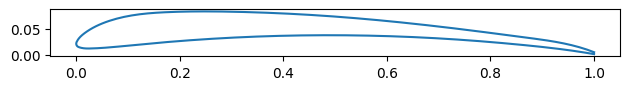

In [55]:
from utils import *
v = 5.7
mass = 0.32
area = 0.2254
d = 0.155
thickness = 0.058
reynolds = reynolds_pipe(velocity=v, diameter=d)
cl = mode_cl(velocity=v, area=area, mass = mass)
af = np.loadtxt('bayesoptim/bo_0.dat', skiprows=1)
# af = set_thickness_pose(af, 25)
# print(cal_thickness_percent(af))
af[:,1] = af[:,1] * thickness / cal_thickness(af)
# af = derotate(af)
# a_up = np.concatenate([np.zeros([10]), np.array([-0.0006, -0.0006, -0.0006, -0.002, -0.005])])
# a_low = np.concatenate([np.zeros([10]), np.array([0.0006, 0.0006, 0.0006, 0.002, 0.01])])
# af = mute_airfoil(af, a_up, a_low)
# af = af[1:255,:]
# af = Normalize(af)
af = interpolate(af, 256, 3)
show_airfoil(af)
perf, a, cd = evalperf(af, cl, reynolds)

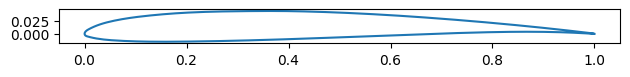

(3.1392, 0.07962979546343912, 3.1392, 39.42242952816975, 0)

In [71]:
from utils import *
af = np.loadtxt('samples/Airfoils1D_60127_0.70_3.dat', skiprows=1)
af[:,1] = af[:,1] * thickness / cal_thickness(af)
af = interpolate(af, 256, 3)
show_airfoil(af)
v = 5.9
mass = 0.32
area = 0.2254
d = 0.155
thickness = 0.058
reynolds = reynolds_pipe(velocity=v, diameter=d)
cl = mode_cl(velocity=v, area=area, mass = mass)
perf, a, cd = evalperf(af, cl, reynolds)
lift = 0.5 * cl * v ** 2 * 1.225 * area
drag = 0.5 * cd * v ** 2 * 1.225 * area
lift, drag, mass * 9.81, perf, check_backpoint(af)

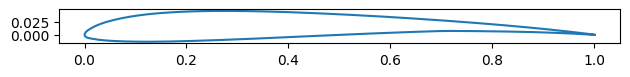

39.71841293387065

In [85]:
from utils import *
af = np.loadtxt('BETTER/20150114-50 +2 d.dat', skiprows=1)
af[:,1] = af[:,1] * thickness / cal_thickness(af)
af = interpolate(af, 256, 3)
show_airfoil(af)
vs = np.linspace(5.5, 6.2, 8)
perfs = []
for v in vs:
    # v = 5.9
    mass = 0.32
    area = 0.2254
    d = 0.155
    thickness = 0.058
    reynolds = reynolds_pipe(velocity=v, diameter=d)
    cl = mode_cl(velocity=v, area=area, mass = mass)
    perf, a, cd = evalperf(af, cl, reynolds)
    perfs.append(perf)
perfs = np.array(perfs)
perfs.mean()

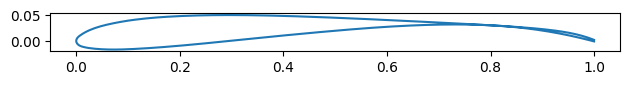

16.1


39.73924823990333

In [2]:
from utils import *
mass = 0.32
area = 0.2254
d = 0.155
thickness = 0.058
af = np.loadtxt('bayesoptim/bo_refine_7.dat', skiprows=1)
af[:,1] = af[:,1] * thickness / cal_thickness(af)
af = interpolate(af, 300, 3)
show_airfoil(af)
print(cal_thickness_percent(af))
vs = np.linspace(5.5, 6.2, 8)
perfs = []
for v in vs:
    reynolds = reynolds_pipe(velocity=v, diameter=d)
    cl = mode_cl(velocity=v, area=area, mass = mass)
    perf, a, cd = evalperf(af, cl, reynolds)
    perfs.append(perf)
perfs = np.array(perfs)
perfs.mean()

In [1]:
from utils import *
airfoil = np.loadtxt('bayesoptim/bo_0.dat', skiprows=1)
airfoil = interpolate(airfoil, 400, 3)
show_airfoil(airfoil)
mass = 0.32
area = 0.2254
d = 0.155
perf = type2_simu(airfoil, mass, d, area)
perf